# TM10007 Assignment template

In this part of the code a connection is made between github and this file.
All the documents from github are imported, inluding our data.
The files that are not needed for our assignment were deleted from github.

In [6]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/NFAFrijns/TM10007_G1_lipo.git

  Preparing metadata (setup.py) ... done


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

                  label  PREDICT_original_sf_compactness_avg_2.5D  \
ID                                                                  
Lipo-001_0  liposarcoma                                  0.368434   
Lipo-002_0  liposarcoma                                  0.660571   
Lipo-003_0       lipoma                                  0.365191   
Lipo-004_0  liposarcoma                                  0.372210   
Lipo-005_0       lipoma                                  0.369120   
...                 ...                                       ...   
Lipo-111_0       lipoma                                  0.244813   
Lipo-112_0  liposarcoma                                  0.197353   
Lipo-113_0  liposarcoma                                  0.307562   
Lipo-114_0       lipoma                                  0.577333   
Lipo-115_0  liposarcoma                                  0.635282   

            PREDICT_original_sf_compactness_std_2.5D  \
ID                                            

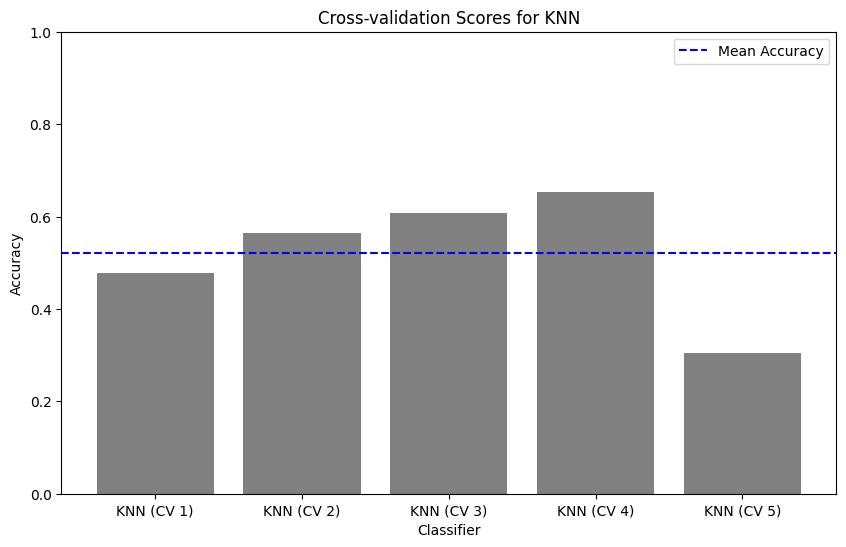

In [18]:
# Import libraries
import pandas as pd
from worclipo.load_data import load_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Import data
# Create a data frame with the sample ID, diagnosis and first 5 features
data = load_data()
feature_data = data.iloc[:, :7]
print(feature_data)

# Split data with 80% train and 20% test
X = feature_data.iloc[:, 2:7]
y = feature_data['label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Implement classifier KNN and perform cross validation
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5) # Here, cv=5 means 5-fold cross-validation

# Print the accuracy for each fold
print("Accuracy for each fold:", scores)

# Print the mean accuracy across all folds
print("Mean accuracy:", scores.mean())

# Plotting the scores
plt.figure(figsize=(10,6))
mean_accuracy = scores.mean()
plt.axhline(y=mean_accuracy, color='blue', linestyle='--', label='Mean Accuracy')

# Individual cross-validation scores
for i, score in enumerate(scores):
    plt.bar(['KNN (CV %d)' % (i+1)], [score], color='gray')

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores for KNN')
plt.ylim(0, 1)
plt.legend()
plt.show()



In [ ]:
# describe the classes
data.value_counts("label")


label
liposarcoma    58
lipoma         57
dtype: int64